<a href="https://colab.research.google.com/github/HIT-YL/py-03/blob/master/wk10_py_data_science_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

## Using pandas

파이썬에서 데이터를 처리하는 모듈을 pandas라고 한다.

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd # 라이브러리의 별명을 pd로 지정하여 임포트
import numpy as np # 라이브러리의 별명을 np로 지정하여 임포트
import matplotlib.pyplot as plt
%matplotlib inline
# 그림을 바로 출력함

### [1] Make data, Series, and DataFrame

- Series는 벡터 구조의 데이터이다.
- DataFrame은 ...

### Series

In [4]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8]) # pd의 벡터 타입의 구조를 만듦
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

=> 숫자 타입이 아닌 것이 중간에 들어가 있음

- NaN은 결과가 없는 데이터를 처리하는 방법이다.

In [5]:
# data_range

# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6) # 데이터는 인덱스 역할을 한다.
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 데이터는 인덱스 역할을 한다.

In [6]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # 무작위 수를 만듦, date를 인덱스로, 문자 ABCD가 각 세로 항목의 제목이 됨
df

,A,B,C,D
2013-01-01,2.781527,0.209973,-1.413150,-0.951044
2013-01-02,0.077341,-2.202341,-0.687312,0.093454
2013-01-03,-0.331994,0.657015,0.132330,-0.826429
2013-01-04,1.143147,-0.532073,1.974910,0.856536
2013-01-05,-0.467073,0.160644,0.144828,0.495642
2013-01-06,-0.428281,-1.233505,0.528520,-0.197733


=> 행렬 구조를 가진 데이터를 각 열의 제목을 지정하고(colums), 데이터에 관한 시간을 행으로 지정하였다.

이러한 과정을 거치는 모듈이 바로 pandas이다.

In [7]:
# check types of df  --> same type
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

데이터의 유효자리 숫자가 32는 짧고 64는 길다. (32 vs 64)

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'), # 리스트가 4개 들어가 있음
                    'E' : pd.Categorical(["test","train","test","train"]), # 문자열임
                    'F' : 'foo' })

데이터 프레임을 만드는 방법은 여러가지가 있다. 

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


=> 브로드캐스트(broadcast)에 의해서 특정 항목의 요소가 4개가 있다면 값이 하나만 있는 항목은 똑같은 내용으로 채워준다.

In [10]:
# check types of df2 --> different types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

=> df와 df2의 차이점은 데이터타입이 다르다는 것이다. 
- pandas는 이질적인, 서로 다른 데이터들을 다룰 수 있는 효율적인 구조다.

### [2] Handling data

In [11]:
# head()
df.head()

# 상위 5개의 데이터를 보여줌

,A,B,C,D
2013-01-01,2.781527,0.209973,-1.413150,-0.951044
2013-01-02,0.077341,-2.202341,-0.687312,0.093454
2013-01-03,-0.331994,0.657015,0.132330,-0.826429
2013-01-04,1.143147,-0.532073,1.974910,0.856536
2013-01-05,-0.467073,0.160644,0.144828,0.495642


In [12]:
df.tail(3)

# 맨 마지막부터 3개까지의 데이터를 보여줌

,A,B,C,D
2013-01-04,1.143147,-0.532073,1.974910,0.856536
2013-01-05,-0.467073,0.160644,0.144828,0.495642
2013-01-06,-0.428281,-1.233505,0.528520,-0.197733


- head는 초반, tail은 마지막 데이터들을 의미한다.

In [13]:
# Display the index, columns, and the underlying NumPy data:
df.index
# 날짜 구조로 된 인덱스

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns # 각 열의 제목을 보여줌

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.462444,-0.490048,0.113354,-0.088262
std,1.286727,1.069170,1.149816,0.716641
min,-0.467073,-2.202341,-1.413150,-0.951044
25%,-0.404210,-1.058147,-0.482401,-0.669255
50%,-0.127327,-0.185715,0.138579,-0.052140
75%,0.876695,0.197641,0.432597,0.395095
max,2.781527,0.657015,1.974910,0.856536


In [17]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


Q. df2는 여섯 개의 항목이 있지만 결과는 3개만 나온다. 그 이유는?

> 평균 등을 계산할 수 있는 숫자형 항목만 요약해서 도출했기 때문이다.



- describe는 숫자형 항목만 처리한다.

In [18]:
# Transposing your dataframe:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,2.781527,0.077341,-0.331994,1.143147,-0.467073,-0.428281
B,0.209973,-2.202341,0.657015,-0.532073,0.160644,-1.233505
C,-1.413150,-0.687312,0.132330,1.974910,0.144828,0.528520
D,-0.951044,0.093454,-0.826429,0.856536,0.495642,-0.197733


#### Sorting

In [19]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False) # 0는 행 기준, ascending=True라면 아래로 내려갈 수록 최근 날짜가 되지만 False이기 때문에 반대로 출력됨

,A,B,C,D
2013-01-06,-0.428281,-1.233505,0.528520,-0.197733
2013-01-05,-0.467073,0.160644,0.144828,0.495642
2013-01-04,1.143147,-0.532073,1.974910,0.856536
2013-01-03,-0.331994,0.657015,0.132330,-0.826429
2013-01-02,0.077341,-2.202341,-0.687312,0.093454
2013-01-01,2.781527,0.209973,-1.413150,-0.951044


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.951044,-1.413150,0.209973,2.781527
2013-01-02,0.093454,-0.687312,-2.202341,0.077341
2013-01-03,-0.826429,0.132330,0.657015,-0.331994
2013-01-04,0.856536,1.974910,-0.532073,1.143147
2013-01-05,0.495642,0.144828,0.160644,-0.467073
2013-01-06,-0.197733,0.528520,-1.233505,-0.428281


In [0]:
# Sorting by values:
df.sort_values(by='B') #, ascending=False)

,A,B,C,D
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707
2013-01-05,-1.903233,0.260631,-0.852355,0.523553
2013-01-06,1.856480,0.596540,0.706853,1.096288
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154
2013-01-03,0.705961,0.864714,-0.323582,-1.741270


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**

at ~에
iat ~에 에 대한 인덱스
loc 로케이션
iloc 로케이션의 인덱스

i는 인덱스를 의미함

데이터들을 선택할 때 인덱싱과 슬라이싱을 사용

In [0]:
# Selecting a single column, which yields a Series
df['A']

2013-01-01    0.809222
2013-01-02   -0.088052
2013-01-03    0.705961
2013-01-04   -0.026440
2013-01-05   -1.903233
2013-01-06    1.856480
Freq: D, Name: A, dtype: float64

In [0]:
# Selecting via [], which slices the rows.
df[0:3] # 행 인덱스 0,1,2까지

,A,B,C,D
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707
2013-01-03,0.705961,0.864714,-0.323582,-1.741270


그런데 아래처럼 인덱스가 아닌 지정된 값을 때는 범위가 다름

In [0]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지정된 범위가 다 선택된다.

,A,B,C,D
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707
2013-01-03,0.705961,0.864714,-0.323582,-1.741270
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154


인덱스로 값에 접근하는 경우와 값의 제목으로 접근하는 경우는 그 범위가 다르다.

#### Selecting data by label

In [0]:
df

,A,B,C,D
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707
2013-01-03,0.705961,0.864714,-0.323582,-1.741270
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154
2013-01-05,-1.903233,0.260631,-0.852355,0.523553
2013-01-06,1.856480,0.596540,0.706853,1.096288


In [0]:
df.loc[dates[0]]   # loc()
# 0번째 데이터 인덱스에 해당하는 값을 가져와라

A    0.809222
B    0.664211
C    0.247640
D    1.012240
Name: 2013-01-01 00:00:00, dtype: float64

In [0]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']] # 인덱싱은 대괄호로 함
# 행은 전부다, 열은 A와 B

,A,B
2013-01-01,0.809222,0.664211
2013-01-02,-0.088052,-0.934719
2013-01-03,0.705961,0.864714
2013-01-04,-0.026440,0.746102
2013-01-05,-1.903233,0.260631
2013-01-06,1.856480,0.596540


#### [도전코딩] - 기말고사 출제

> Select data for first two days AND comumn 3,4 from df.

In [0]:
#df.loc[1:3,['C','D']] - 에러 발생
#df.loc['20130101':'20130102',['C','D']] 성공
df.loc[dates[:2],['C','D']] # 성공

,C,D
2013-01-01,0.247640,1.012240
2013-01-02,-0.452379,-1.288707


loc는 안에 인덱스가 들어가는 게 아니라 각 항목의 값들이 들어감 그렇기 때문에 첫 번째가 에러
iloc이 인덱스

In [0]:
# [다시 도전]
df.iloc[:2,2:4]

,C,D
2013-01-01,0.247640,1.012240
2013-01-02,-0.452379,-1.288707


#### Selecting data by position  (iloc())

In [0]:
df

,A,B,C,D
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707
2013-01-03,0.705961,0.864714,-0.323582,-1.741270
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154
2013-01-05,-1.903233,0.260631,-0.852355,0.523553
2013-01-06,1.856480,0.596540,0.706853,1.096288


In [0]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨.

A   -0.026440
B    0.746102
C   -0.311259
D   -0.359154
Name: 2013-01-04 00:00:00, dtype: float64

In [0]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]

,C,D
2013-01-01,0.247640,1.012240
2013-01-02,-0.452379,-1.288707


In [0]:
# Select one item
df.iloc[1,1]

-0.9347192280250628

numpy는 수학적 구조, pandas는 데이터구조

#### Selecting data by Boolean indexing

In [0]:
df

,A,B,C,D
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707
2013-01-03,0.705961,0.864714,-0.323582,-1.741270
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154
2013-01-05,-1.903233,0.260631,-0.852355,0.523553
2013-01-06,1.856480,0.596540,0.706853,1.096288


In [0]:
df[df.A > 0] # A의 요소들 중에서 0보다 큰 값을 만족하는 데이터 행을 찾아냄

,A,B,C,D
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-03,0.705961,0.864714,-0.323582,-1.741270
2013-01-06,1.856480,0.596540,0.706853,1.096288


In [0]:
df[df > 0] # 전체가 0보다 큰 것

,A,B,C,D
2013-01-01,0.809222,0.664211,0.247640,1.012240
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.705961,0.864714,NaN,NaN
2013-01-04,NaN,0.746102,NaN,NaN
2013-01-05,NaN,0.260631,NaN,0.523553
2013-01-06,1.856480,0.596540,0.706853,1.096288


=> 0보다 큰 것은 숫자로 출력, 아닌 것은 NaN으로 출력

### Setting (데이터 재구성 또는 확장)

In [0]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
df['F'] = s1

In [0]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

,A,B,C,D,F
2013-01-01,0.809222,0.664211,0.247640,1.012240,NaN
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707,1.0
2013-01-03,0.705961,0.864714,-0.323582,-1.741270,2.0
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154,3.0
2013-01-05,-1.903233,0.260631,-0.852355,0.523553,4.0
2013-01-06,1.856480,0.596540,0.706853,1.096288,5.0


In [0]:
# Setting values by label:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.664211,0.247640,1.012240,NaN
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707,1.0
2013-01-03,0.705961,0.864714,-0.323582,-1.741270,2.0
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154,3.0
2013-01-05,-1.903233,0.260631,-0.852355,0.523553,4.0
2013-01-06,1.856480,0.596540,0.706853,1.096288,5.0


In [0]:
# Setting values by position (index):
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.247640,1.012240,NaN
2013-01-02,-0.088052,-0.934719,-0.452379,-1.288707,1.0
2013-01-03,0.705961,0.864714,-0.323582,-1.741270,2.0
2013-01-04,-0.026440,0.746102,-0.311259,-0.359154,3.0
2013-01-05,-1.903233,0.260631,-0.852355,0.523553,4.0
2013-01-06,1.856480,0.596540,0.706853,1.096288,5.0


In [0]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.247640,5,NaN
2013-01-02,-0.088052,-0.934719,-0.452379,5,1.0
2013-01-03,0.705961,0.864714,-0.323582,5,2.0
2013-01-04,-0.026440,0.746102,-0.311259,5,3.0
2013-01-05,-1.903233,0.260631,-0.852355,5,4.0
2013-01-06,1.856480,0.596540,0.706853,5,5.0


### Missing data

- pandas primarily uses the value np.nan to represent missing data. 

In [0]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) # 인덱스를 변경 (reindex)
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.247640,5,NaN,NaN
2013-01-02,-0.088052,-0.934719,-0.452379,5,1.0,NaN
2013-01-03,0.705961,0.864714,-0.323582,5,2.0,NaN
2013-01-04,-0.026440,0.746102,-0.311259,5,3.0,NaN


추가된 E클래스에는 값이 할당되지 않았으므로 NaN

In [0]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.247640,5,NaN,1.0
2013-01-02,-0.088052,-0.934719,-0.452379,5,1.0,1.0
2013-01-03,0.705961,0.864714,-0.323582,5,2.0,NaN
2013-01-04,-0.026440,0.746102,-0.311259,5,3.0,NaN


In [0]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.088052,-0.934719,-0.452379,5,1.0,1.0


In [0]:
# Filling missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.262095,5,5.0,1.0
2013-01-02,0.211868,-1.579587,-2.683894,5,1.0,1.0
2013-01-03,0.848057,-0.608595,-0.504568,5,2.0,5.0
2013-01-04,0.574100,1.764378,0.159496,5,3.0,5.0


In [0]:
# Get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

In [0]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.262095,5,NaN
2013-01-02,0.211868,-1.579587,-2.683894,5,1.0
2013-01-03,0.848057,-0.608595,-0.504568,5,2.0
2013-01-04,0.574100,1.764378,0.159496,5,3.0
2013-01-05,0.687078,-0.855211,2.660508,5,4.0
2013-01-06,0.669938,-0.589471,-0.455005,5,5.0


In [0]:
df.mean()

A    0.498507
B   -0.311414
C   -0.180926
D    5.000000
F    3.000000
dtype: float64

=> NaN은 빼고 계산

In [0]:
df.mean(0)

A    0.498507
B   -0.311414
C   -0.180926
D    5.000000
F    3.000000
dtype: float64

In [0]:
df.mean(1)

2013-01-01    1.184476
2013-01-02    0.389677
2013-01-03    1.346979
2013-01-04    2.099595
2013-01-05    2.298475
2013-01-06    1.925092
Freq: D, dtype: float64

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

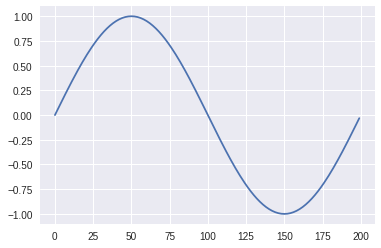

In [0]:
# sin그래프를 그린다
%matplotlib inline 
# 그래프가 노트북 자체에 바로 그려짐
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01)) # sin함수 호출, pi는 원주율 3.14, 0부터 ...
t = plt.plot(s)    # sin의 그래프를 그림

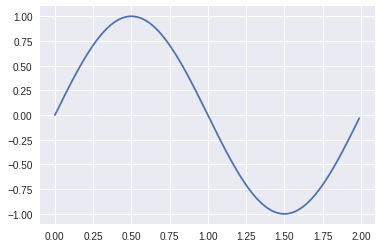

In [0]:
plt.plot(np.arange(0.0, 2.0, 0.01),s)

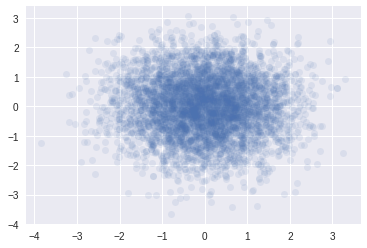

In [0]:
# 산포도(scatter plot)를 그린다
# 2차원 공간에 점을 찍음
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성
y = np.random.randn(5000)
t = plt.plot(x, y, 'o', alpha=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


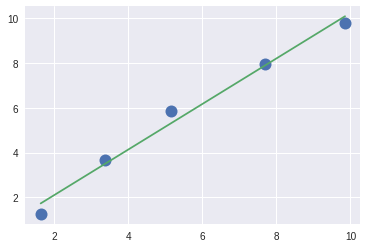

In [0]:
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775])
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)]) 
a = a.T # 트랜스포즈
m, c = np.linalg.lstsq(a, y)[0]
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

### plot( )로 그림을 제어

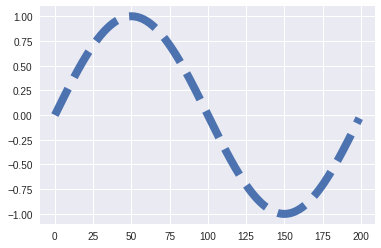

In [0]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=8)

### 문자를 삽입한다

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [0]:
fontsfamily[:5]

['c:\\windows\\fonts\\teamviewer13.otf',
 'C:\\WINDOWS\\Fonts\\segoescb.ttf',
 'c:\\windows\\fonts\\framd.ttf',
 'C:\\WINDOWS\\Fonts\\Gabriola.ttf',
 'C:\\WINDOWS\\Fonts\\PARCHM.TTF']

***

# Chapter 12-04
## 일본 인구를 시각화한다

### 인구 데이터를 읽어 들임

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving female_1944_2014.csv to female_1944_2014 (1).csv


In [0]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",",    # delimiter는 구분자
                      skiprows=1, usecols=range(1, 22))
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

In [0]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1)
p_yearly

[[8712. 8803. 8684. ...    0.    0.    0.]
 [9251. 8581. 8645. ...    0.    0.    0.]
 [7858. 8734. 8692. ...    0.    0.    0.]
 ...
 [5272. 5407. 5868. ... 1146.  331.   51.]
 [5239. 5361. 5790. ... 1215.  343.   55.]
 [5213. 5307. 5713. ... 1305.  352.   60.]]


array([ 73063.,  71999.,  73115.,  78101.,  80003.,  81771.,  83199.,
        84571.,  85854.,  87034.,  88294.,  89277.,  90258.,  91086.,
        92010.,  92971.,  93420.,  94285.,  95179.,  96157.,  97187.,
        98275.,  99054., 100244., 101410., 102649., 103719., 105013.,
       107334., 108709., 110050., 111940., 113086., 114153., 115174.,
       116131., 117061., 117879., 118693., 119485., 120237., 121046.,
       121672., 122264., 122784., 123254., 123611., 124044., 124452.,
       124765., 125033., 125568., 125865., 126169., 126485., 126685.,
       126923., 127289., 127433., 127618., 127687., 127766., 127769.,
       127767., 127690., 127509., 128057., 127799., 127513., 127295.,
       127082.])

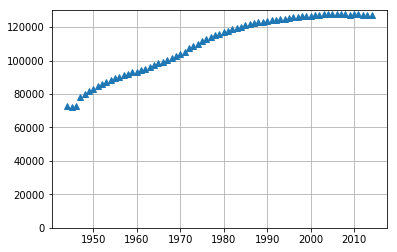

In [0]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^')
plt.ylim((0, 130000)) # y축의 범위
plt.grid(True)

연도별 전체인구가 y축, 연도는 x축

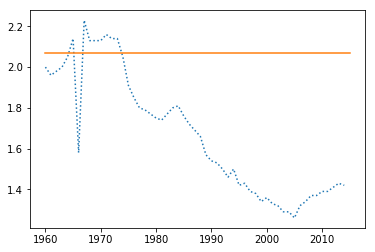

In [0]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1)
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":")
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07])

출생률이 노란색 라인보다 낮으면 인구율이 줄어든다는 뜻

### 인구 피라미드를 그린다

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3) # bar 그래프를 그림
    ax[0].set(ylim=(0, 100), xlim=(0, 6000)) # y축과 x축을 설정
    ax[0].invert_xaxis() 
    ax[0].yaxis.tick_right() # 눈금은 오른쪽에 배치
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off')
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


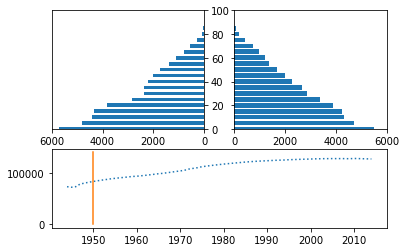

In [0]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014)

> year를 변경해서 그래프를 그려보시오.

***

## 특강안내

### VR 응용과 전망 (HC 관련 내용 포함)

### 11월8일(목) 4시~6시, 신어관 101호 강당

***

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***